In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8

In [2]:
df = pd.read_csv('/content/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.shape

(3000, 3)

In [5]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

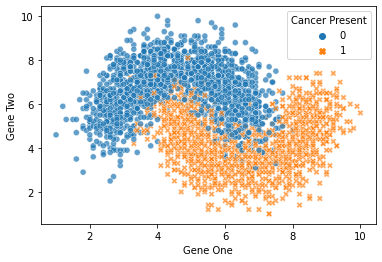

In [6]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df,hue='Cancer Present',alpha=0.7,style='Cancer Present')

(3.0, 10.0)

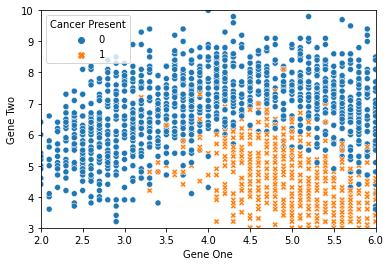

In [7]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,style='Cancer Present')
plt.xlim(2,6)
plt.ylim(3,10)
#plt.legend(loc=(1.1,0.5))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
scaled_X_train

array([[ 0.03459731,  2.3863981 ],
       [-0.2936603 , -0.23592591],
       [ 0.74582214, -0.46902138],
       ...,
       [-1.66140036,  0.57990822],
       [-0.67662752,  0.92955142],
       [-1.16901394,  1.22092076]])

In [14]:
df1 = pd.DataFrame(data=scaled_X_train,columns=X_train.columns,index=X_train.index)

In [15]:
df1

,Gene One,Gene Two
1927,0.034597,2.386398
550,-0.293660,-0.235926
2974,0.745822,-0.469021
445,0.691113,0.929551
849,-1.169014,1.628838
...,...,...
163,0.034597,1.046099
607,-0.621918,-0.818665
1916,-1.661400,0.579908
1667,-0.676628,0.929551


In [16]:
X_train.head()

,Gene One,Gene Two
1927,5.7,9.5
550,5.1,5.0
2974,7.0,4.6
445,6.9,7.0
849,3.5,8.2


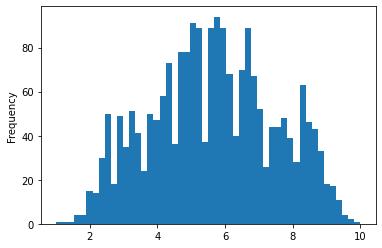

In [17]:
X_train['Gene One'].plot(kind='hist',bins=50)

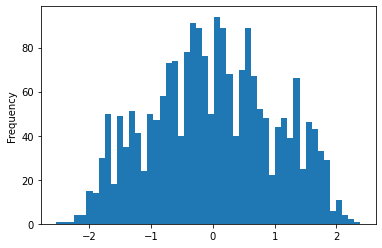

In [18]:
df1['Gene One'].plot(kind='hist',bins=50)

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# MODEL EVALUATION

In [22]:
y_pred = knn_model.predict(scaled_X_test)

In [23]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [24]:
accuracy_score(y_test,y_pred)

0.9111111111111111

In [25]:
confusion_matrix(y_test,y_pred)

array([[422,  40],
       [ 40, 398]])

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=knn_model.classes_)

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)

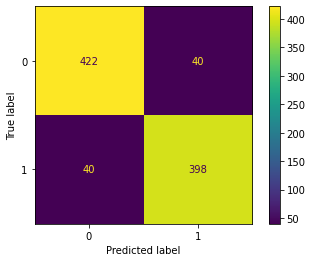

In [28]:
disp.plot()
plt.show()

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       462
           1       0.91      0.91      0.91       438

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



## Elbow Method for Choosing Reasonable K Values

**NOTE: This uses the test set for the hyperparameter selection of K.**

In [30]:
acc = accuracy_score(y_test,y_pred)
err = 1-acc
print(f'hasil error rates {err}')
print(f'hasil accuracy score {acc}')


hasil error rates 0.0888888888888889
hasil accuracy score 0.9111111111111111


In [31]:
test_error_rates = []
train_acc_manhattan = []
test_acc_manhattan = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

    train_acc_manhattan.append(knn_model.score(scaled_X_train, y_train))
    test_acc_manhattan.append(knn_model.score(scaled_X_test, y_test))

Text(0.5, 0, 'K Value')

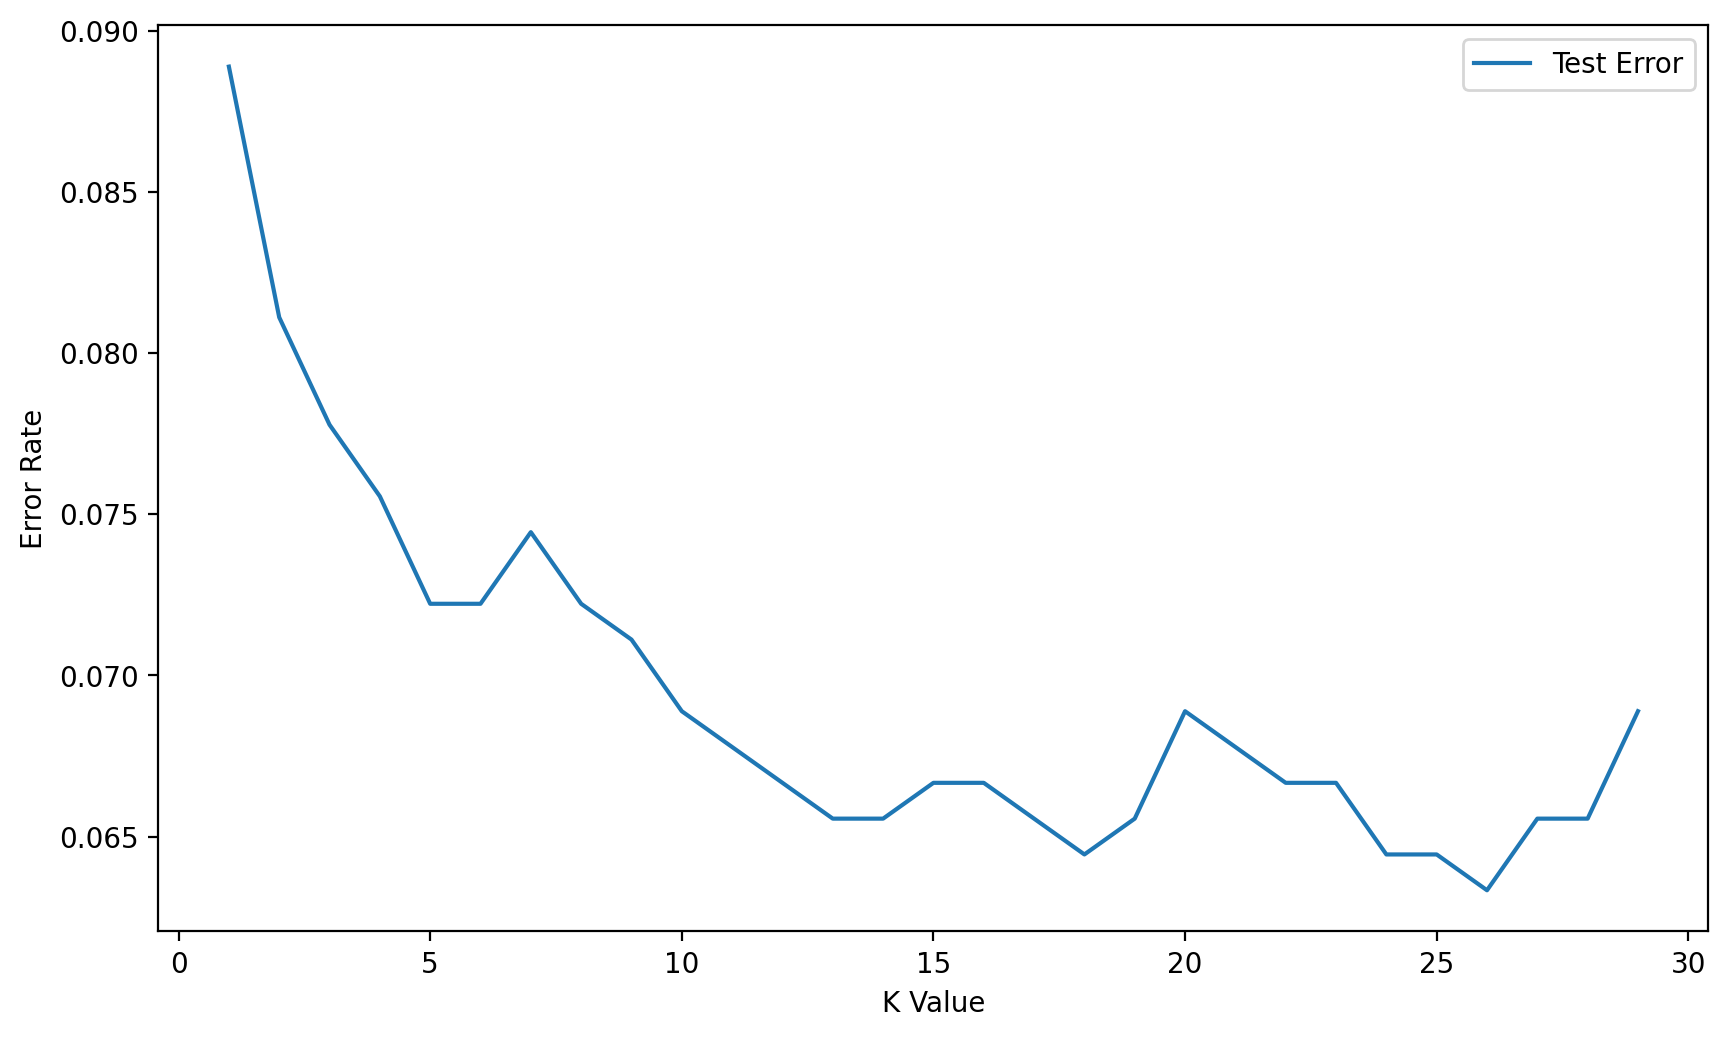

In [32]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

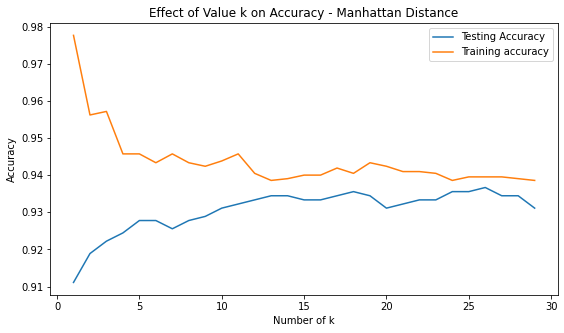

In [35]:

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

plt.title('Effect of Value k on Accuracy - Manhattan Distance')
plt.plot(range(1, 30), test_acc_manhattan, label='Testing Accuracy')
plt.plot(range(1, 30), train_acc_manhattan, label='Training accuracy')

plt.legend()
plt.xlabel('Number of k')
plt.ylabel('Accuracy')
plt.show()

#NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(scaled_X_train,y_train)

In [ ]:
y_pred_nb = nb.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,y_pred_nb)

In [ ]:
confusion_matrix(y_test,y_pred_nb)

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_nb))

In [ ]:
acc_nb = accuracy_score(y_test,y_pred_nb)
result = acc-acc_nb
print(f'hasil selisih accuracy score KNN dan Naive Bayes adalah {result}')

# Trining Time

In [ ]:
nb = GaussianNB()
%timeit nb.fit(scaled_X_train,y_train)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=11)
%timeit knn_model.fit(scaled_X_train,y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
%timeit logreg.fit(scaled_X_train,y_train)

In [ ]:
%timeit y_pred_11 = knn_model.predict(scaled_X_test)

In [ ]:
%timeit y_pred_logreg = logreg.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,y_pred_11)

In [ ]:
confusion_matrix(y_test,y_pred_11) # accuray n=11

In [ ]:
confusion_matrix(y_test,y_pred) # accuracy n=1